In [36]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as c

#Make np arrays print in scientific notation:
np.set_printoptions(formatter={'float': lambda x: format(x, '9.4E')})
#Make numbers display in exponential form:
%precision %e

u'%e'

In [2]:
indx, halomass, haloradius, vmax, xpos, y, z, v_x, v_y, v_z = np.loadtxt (
    "halo_bolshoi_z0.00_D360.dat", unpack=True)
#halo mass per 250/0.7 cubic megaparsecs

In [3]:
#Output the arrays in a columnated format so I can see what I'm working with
np.savetxt("columnated.txt",zip(indx,halomass,haloradius,vmax,xpos, y, z, v_x,
                         v_y, v_z), fmt='%30.8f')

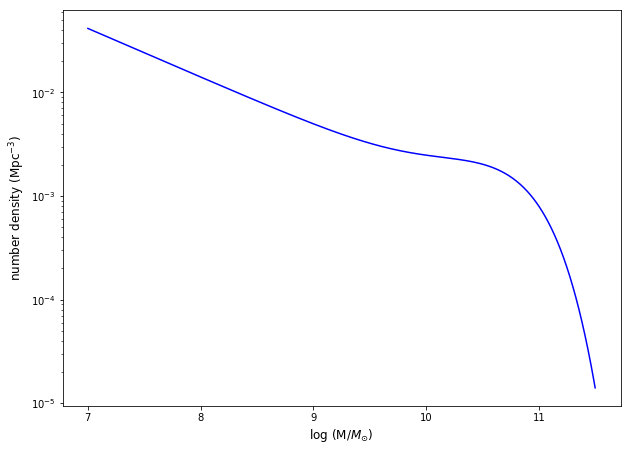

In [4]:
#CALCULATING AND PLOTTING THE GALAXY MASS DENSITY FUNCTION

m_ast = 10.**10.66 #M* in solar mass
phi_ast1 = 3.96*10.**-3. #Mpc^-3
alpha1 = -0.35
phi_ast2 = 0.79*10.**-3. #Mpc^-3
alpha2 = -1.47

logmratio = np.linspace(7,11.5,1000) #Log of Galaxy mass to solar mass
m = 10**logmratio #galaxy mass in solar mass
phi = np.exp(-m/m_ast)*(phi_ast1*(m/m_ast)**alpha1+phi_ast2*(m/m_ast)
                        **alpha2)/m_ast*m

fig=plt.figure(figsize=(10,16))

galaxymassplt=fig.add_subplot(2,1,1)

galaxymassplt.semilogy(logmratio,phi,'b-')
galaxymassplt.set_ylabel('number density (Mpc$^{-3}$)',fontsize=12)
galaxymassplt.set_xlabel('log (M/$M_{\odot}$)',fontsize=12)

plt.show()

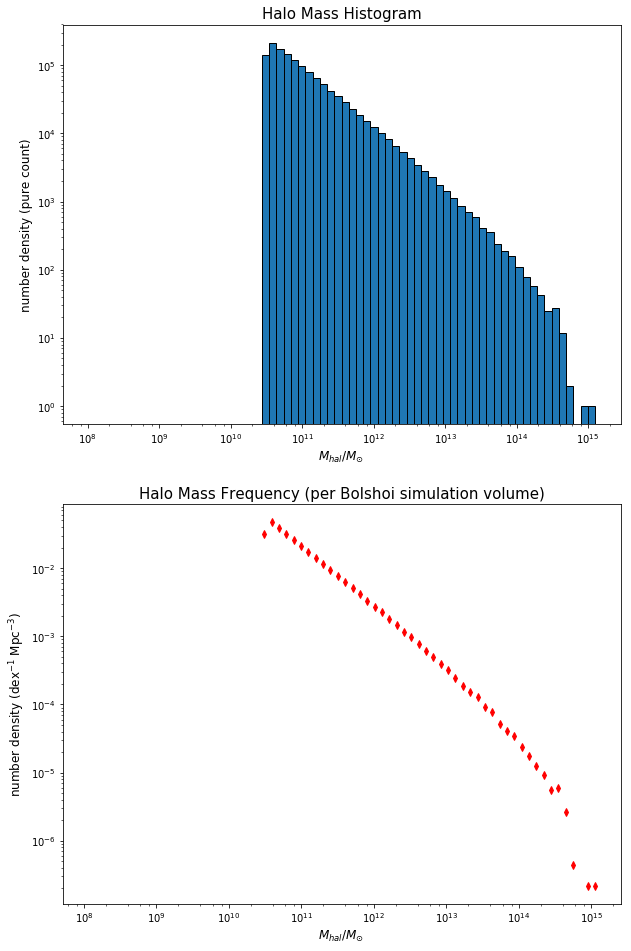

[8.0000E+00 8.1014E+00 8.2029E+00 8.3043E+00 8.4057E+00 8.5071E+00
 8.6086E+00 8.7100E+00 8.8114E+00 8.9129E+00 9.0143E+00 9.1157E+00
 9.2171E+00 9.3186E+00 9.4200E+00 9.5214E+00 9.6229E+00 9.7243E+00
 9.8257E+00 9.9271E+00 1.0029E+01 1.0130E+01 1.0231E+01 1.0333E+01
 1.0434E+01 1.0536E+01 1.0637E+01 1.0739E+01 1.0840E+01 1.0941E+01
 1.1043E+01 1.1144E+01 1.1246E+01 1.1347E+01 1.1449E+01 1.1550E+01
 1.1651E+01 1.1753E+01 1.1854E+01 1.1956E+01 1.2057E+01 1.2159E+01
 1.2260E+01 1.2361E+01 1.2463E+01 1.2564E+01 1.2666E+01 1.2767E+01
 1.2869E+01 1.2970E+01 1.3071E+01 1.3173E+01 1.3274E+01 1.3376E+01
 1.3477E+01 1.3579E+01 1.3680E+01 1.3781E+01 1.3883E+01 1.3984E+01
 1.4086E+01 1.4187E+01 1.4289E+01 1.4390E+01 1.4491E+01 1.4593E+01
 1.4694E+01 1.4796E+01 1.4897E+01 1.4999E+01 1.5100E+01]
10.0
[1.0000E+00 1.1000E+00 1.2000E+00 1.3000E+00 1.4000E+00 1.5000E+00
 1.6000E+00 1.7000E+00 1.8000E+00 1.9000E+00 2.0000E+00]


In [40]:
#BINNING AND PLOTTING HALO MASS DENSITIES

binsize=0.1 #Bin size is 0.1 dex
#Creating the bins, which span from 8 dex to 15 dex:
bins=np.logspace(8,15.1,(15.1-8.)/binsize+1) #non-exponential bins
logbins=np.log10(bins) #bins in dex units

fig=plt.figure(figsize=(10,25))

halomassplot=fig.add_subplot(3,1,1)
halofreq, binsout, patches = halomassplot.hist(halomass,bins=bins,edgecolor='k')
halomassplot.set_xscale('log')
halomassplot.set_yscale('log')
halomassplot.set_ylabel('number density (pure count)',fontsize=12)
halomassplot.set_xlabel('$M_{hal}/M_{\odot}$',fontsize=12)
halomassplot.set_title('Halo Mass Histogram',fontsize=15)

#Frequency per cubic Megaparsec (diving by bin size to make the function independent of binsize):
halofreq=halofreq/(250./0.7)**3./binsize
midbins = (binsout[1:]+binsout[:-1])/2.
logmidbins=np.log10(midbins)

dotplot=fig.add_subplot(3,1,2)
dotplot.plot(midbins,halofreq,'rd',markersize=5)
dotplot.set_xscale('log')
dotplot.set_yscale('log')
dotplot.set_ylabel('number density (dex$^{-1}$ Mpc$^{-3}$)',fontsize=12)
dotplot.set_xlabel('$M_{hal}/M_{\odot}$',fontsize=12)
dotplot.set_title('Halo Mass Frequency (per Bolshoi simulation volume)',fontsize=15)

plt.show()

##
print np.log10(bins)
print (2.-1.)/0.1
print np.log10(np.logspace(1.,2.,(2.-1.)/binsize+1))
##

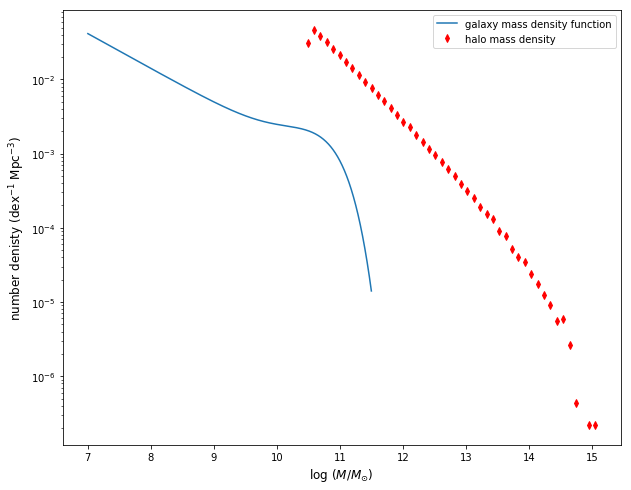

In [41]:
plt.figure(figsize=(10,8))

plt.semilogy(logmratio,phi,label='galaxy mass density function') #Plot the galaxy mass function
plt.xlabel('log ($M/M_{\odot}$)',fontsize=12)
plt.ylabel('number denisty (dex$^{-1}$ Mpc$^{-3}$)',fontsize=12)
#plt.ylim(10.**-5.,10.**-0.5)
#plt.xlim(6.8,12.4)

plt.semilogy(logmidbins,halofreq,'rd',markersize=5,label='halo mass density')

plt.legend()

plt.show()

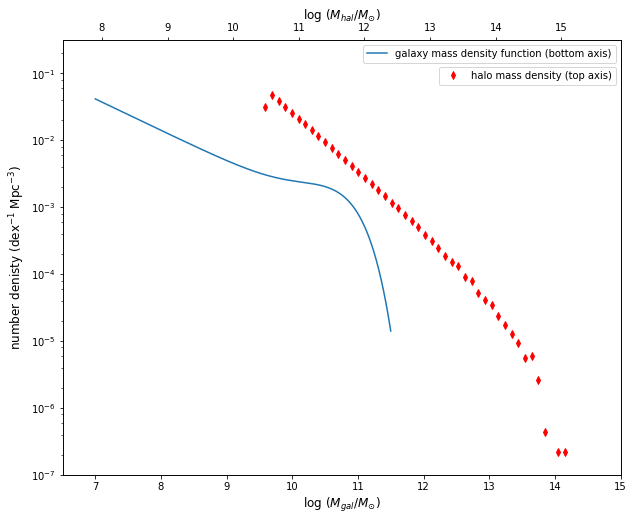

In [42]:
plt.figure(figsize=(10,8))

plt.semilogy(logmratio,phi,label='galaxy mass density function (bottom axis)') #Plot the galaxy mass function
plt.xlabel('log ($M_{gal}/M_{\odot}$)',fontsize=12)
plt.ylabel('number denisty (dex$^{-1}$ Mpc$^{-3}$)',fontsize=12)
plt.xlim(6.5,15)

plt.legend()

plt.twiny() #make a second x axis
plt.ylim(10.**-7.,10.**-0.5)

plt.semilogy(logmidbins,halofreq,'rd',markersize=5,label='halo mass density (top axis)')
plt.xlim(7.4,15.9)
plt.xlabel('log ($M_{hal}/M_{\odot}$)',fontsize=12)

plt.legend(bbox_to_anchor=[1,0.95])

plt.show()

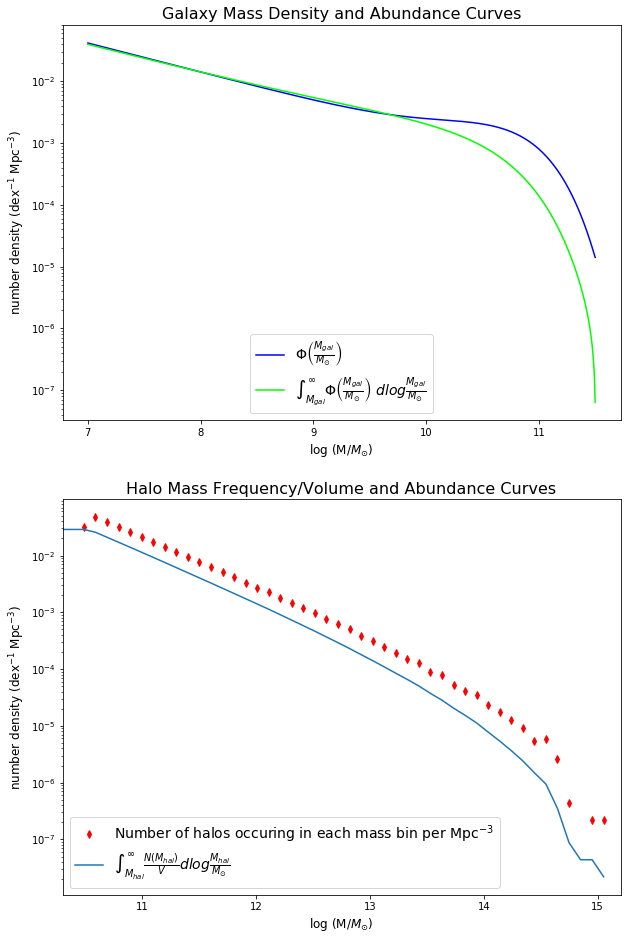

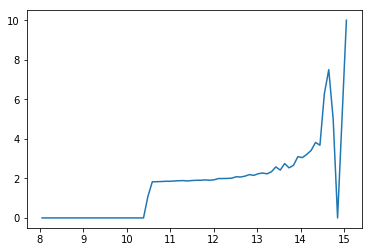

[0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 1.0890E+00 1.8271E+00 1.8322E+00 1.8398E+00 1.8536E+00 1.8534E+00
 1.8692E+00 1.8821E+00 1.8876E+00 1.8702E+00 1.8919E+00 1.9038E+00
 1.9060E+00 1.9221E+00 1.9079E+00 1.9287E+00 1.9908E+00 1.9932E+00
 1.9971E+00 2.0104E+00 2.0816E+00 2.0687E+00 2.1120E+00 2.1917E+00
 2.1516E+00 2.2352E+00 2.2708E+00 2.2294E+00 2.3347E+00 2.5795E+00
 2.4193E+00 2.7498E+00 2.5321E+00 2.6609E+00 3.0994E+00 3.0508E+00
 3.2114E+00 3.4132E+00 3.8182E+00 3.6765E+00 6.2791E+00 7.5000E+00
 5.0000E+00 0.0000E+00 5.0000E+00 1.0000E+01]

0.028798345856
0.028798345856
[1.0000E+00 2.0000E+00 2.0000E+00 4.0000E+00 1.6000E+01 4.3000E+01
 6.8000E+01 1.1000E+02 1.6700E+02 2.4600E+02 3.5400E+02 5.1300E+02
 6.9900E+02 9.3600E+02 1.2910E+03 1.7030E+03 2.2950E

In [43]:
#CREATE THE ABUNDANCE CURVE FOR GALAXY MASS
revphi = np.flip(phi,0) #reverse galaxy number density array so I can calculate the area as the integral from M_gal to inf
revlogmratio = np.flip(logmratio,0) #reverse the logmratio array so I can plot the area later in the code
dx_gal = (logmratio.max()-logmratio.min())/(len(logmratio))
sumdy_gal = np.array([revphi[:i].sum() for i in np.arange(1,len(phi)+1,1)])
galaxyarea=sumdy_gal*dx_gal

fig=plt.figure(figsize=(10,16))

galaxymassplt=fig.add_subplot(2,1,1)
#Replot the galaxy mass density function created earlier
galaxymassplt.semilogy(logmratio,phi,'b-',
                      label='$\\Phi \\left(\\frac{M_{gal}}{M_{\\odot}} \\right)$')
galaxymassplt.set_ylabel('number density (dex$^{-1}$ Mpc$^{-3}$)',fontsize=12)
galaxymassplt.set_xlabel('log (M/$M_{\odot}$)',fontsize=12)
#Plot the area under the galaxy mass density function according to the integral from M_gal to inf
galaxymassplt.semilogy(revlogmratio,galaxyarea,color=(0,1,0),
                       label='$\\int_{M_{gal}}^{\\infty}\\Phi \\left(\\frac{M_{gal}}{M_{\\odot}} \\right)\;'
                       'dlog\\frac{M_{gal}}{M_{\\odot}}$')
galaxymassplt.legend(fontsize=14,loc='lower center')
galaxymassplt.set_title('Galaxy Mass Density and Abundance Curves',fontsize=16)
                        
#CREATE THE ABUNDANCE CURVE FOR HALO MASS
#reverse the halo frequency array so I can calculate the area as the integral
#from M_hal to infinity:
revhalofreq = np.flip(halofreq,0)
#reverse the logmidbins array so I can plot the area later in the code:
revlogmidbins = np.flip(logmidbins,0)
#Create an array of the sum of all frequencies/Mpc^3 from M_hal to infinity, using revhalofreq, which
#starts from the most massive halos and progresses to the least massive halos:
sumdy_hal=np.array([revhalofreq[:i].sum() for i in np.arange(1,len(revhalofreq)+1,1)])
#midpoint approximation of the the curve of integral of all HO frequencies/Mpc^3 from M_hal to
#infinity:
haloarea=sumdy_hal*binsize

haloabundanceplt=fig.add_subplot(2,1,2)
haloabundanceplt.semilogy(logmidbins,halofreq,'rd',markersize=5,label='Number of halos occuring in each mass bin per Mpc$^{-3}$')
haloabundanceplt.semilogy(revlogmidbins,haloarea,label='$\\int_{M_{hal}}^{\infty}\\frac{N(M_{hal})}{V}dlog\\frac{M_{hal}}{M_{\odot}}$')
haloabundanceplt.set_xlabel('log (M/$M_{\odot}$)',fontsize=12)
haloabundanceplt.set_ylabel('number density (dex$^{-1}$ Mpc$^{-3}$)',fontsize=12)
haloabundanceplt.legend(fontsize=14)
haloabundanceplt.set_title('Halo Mass Frequency/Volume and Abundance Curves',fontsize=16)
haloabundanceplt.set_xlim(10.3,15.2)

plt.savefig('Abundance Curves.png')
plt.show()

##DEBUGGING
revhaloarea=np.flip(haloarea,0)
plt.plot(logmidbins,halofreq/revhaloarea)
plt.show()

arr=halofreq/revhaloarea
print arr
print''
print halomass.size/(250./0.7)**3. #This is a test. With a bin that captures all the halos, this output is the number density of all halos in the universe per Megaparsec per dex.
print np.max(haloarea)
print haloarea*(250./0.7)**3.
print np.max(haloarea*(250./0.7)**3.)
print halomass.size
print np.log10(np.min(halomass))
print np.log10(np.max(halomass))
##END DEBUGGING

In [44]:
print np.arange(1,len(revhalofreq)+1,1)
print revhalofreq
print len(revhalofreq)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[2.1952E-07 2.1952E-07 0.0000E+00 4.3904E-07 2.6342E-06 5.9270E-06
 5.4880E-06 9.2198E-06 1.2513E-05 1.7342E-05 2.3708E-05 3.4904E-05
 4.0831E-05 5.2026E-05 7.7930E-05 9.0442E-05 1.2996E-04 1.5344E-04
 1.8857E-04 2.4850E-04 3.1501E-04 3.8636E-04 5.0402E-04 6.1575E-04
 7.6042E-04 9.6633E-04 1.1681E-03 1.4499E-03 1.8073E-03 2.2538E-03
 2.7054E-03 3.3071E-03 4.1246E-03 5.0531E-03 6.2339E-03 7.6406E-03
 9.2907E-03 1.1559E-02 1.4197E-02 1.7341E-02 2.1106E-02 2.5912E-02
 3.1517E-02 3.8428E-02 4.6886E-02 3.1360E-02 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00]
70
